<a href="https://colab.research.google.com/github/Yewon9/OpenCV_AIRLab/blob/main/histo_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow

In [7]:
import cv2, numpy as np
import matplotlib.pylab as plt

In [3]:
img1 = cv2.imread('taekwonv1.jpg')
img2 = cv2.imread('taekwonv2.jpg')
img3 = cv2.imread('taekwonv3.jpg')
img4 = cv2.imread('dr_ochanomizu.jpg')

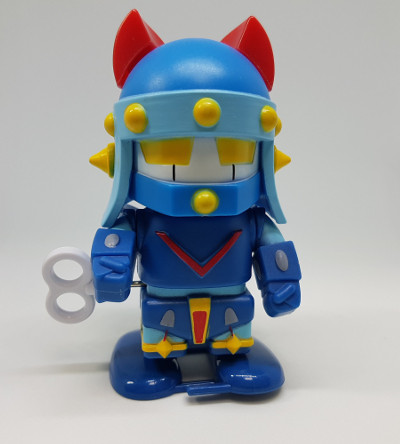

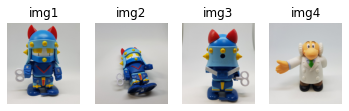

In [9]:
cv2_imshow(img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)

In [8]:
query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: 
            ret = ret/np.sum(query)
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()

CORREL    	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR    	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT 	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	
